# Kollokasjoner for nøkkelord

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [2]:
css()

In [75]:
code_toggle()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
import pandas as pd

In [5]:
import ast

In [6]:
#colls_before = pd.read_json('demokrati_before.json')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [9]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [10]:
reference = pd.read_json('avis_agg_sample_20.json')

In [11]:
keyword = 'demokrati'

In [12]:
filename = 'collocation_' + keyword + ".csv"

## Grafstruktur topos

In [13]:
keyword_graph = nb.make_graph(keyword, cutoff=16)

In [14]:
comm = gnl.community_dict(keyword_graph)

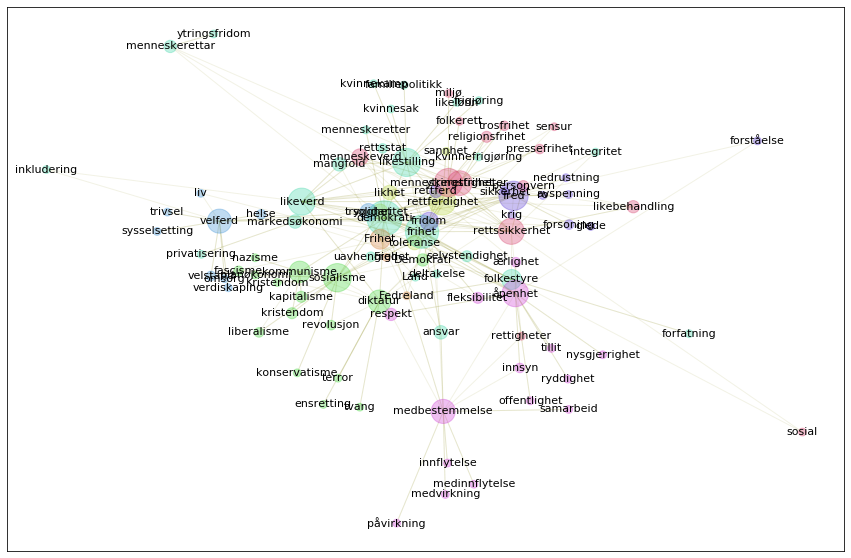

In [15]:
gnl.show_graph(keyword_graph, spread=0.8, fontsize=11)

In [16]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [17]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ' ,'.join(i)))

<span style='font-size:1.1em'>fascisme ,medbestemmelse ,fred ,rettsstat ,personvern ,demokrati ,diktatur ,likestilling ,kristendom ,rettferdighet ,trygghet ,revolusjon ,frihet ,pressefrihet ,menneskerettigheter ,sosialisme ,likebehandling ,innsyn ,liberalisme ,Demokrati ,trosfrihet ,ytringsfrihet ,selvstendighet ,sikkerhet ,solidaritet ,forsoning ,toleranse ,menneskeverd ,integritet ,menneskerettar ,glede ,rettferd ,Frihet ,åpenhet ,likeverd ,religionsfrihet ,mangfold ,fridom ,kommunisme ,rettssikkerhet ,velferd ,fleksibilitet ,Kristendom ,respekt ,folkestyre ,sosial ,kapitalisme ,markedsøkonomi ,likhet ,uavhengighet</span>

<span style='font-size:1.1em'>diktatur ,demokrati ,sosialisme ,kommunisme</span>

<span style='font-size:1.1em'>frihet ,likeverd ,menneskerettigheter ,sosialisme ,rettssikkerhet ,fred ,folkestyre ,demokrati ,likestilling ,likhet ,rettferdighet ,Frihet ,trygghet ,menneskeverd ,ytringsfrihet</span>

<span style='font-size:1.1em'>frihet ,likeverd ,menneskerettigheter ,fred ,demokrati ,likestilling ,rettferdighet ,menneskeverd</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [18]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### rettferdighet-solidaritet
<span style='font-size:1.1em'>rettferdighet, solidaritet, toleranse, likhet, sannhet</span>
### sosialisme-diktatur
<span style='font-size:1.1em'>sosialisme, diktatur, kommunisme, Demokrati, kristendom, kapitalisme, fascisme, liberalisme, revolusjon, nazisme, ensretting, Kristendom, tvang, konservatisme, planøkonomi, terror</span>
### demokrati-frihet
<span style='font-size:1.1em'>demokrati, frihet, likestilling, likeverd, folkestyre, ansvar, mangfold, markedsøkonomi, menneskerettar, selvstendighet, rettsstat, uavhengighet, likelønn, ytringsfridom, kvinnefrigjøring, kvinnesak, Land, deltakelse, forfatning, kvinnekamp, familiepolitikk, integritet, privatisering, frigjøring, inkludering, menneskeretter</span>
### velferd-trygghet
<span style='font-size:1.1em'>velferd, trygghet, velstand, helse, verdiskaping, liv, omsorg, trivsel, sysselsetting</span>
### fred-fridom
<span style='font-size:1.1em'>fred, fridom, rettferd, forsoning, forståelse, glede, ro, krig, avspenning, nedrustning, sikkerhet</span>
### åpenhet-medbestemmelse
<span style='font-size:1.1em'>åpenhet, medbestemmelse, respekt, fleksibilitet, ærlighet, innsyn, innflytelse, offentlighet, tillit, påvirkning, medvirkning, samarbeid, medinnflytelse, ryddighet, nysgjerrighet</span>
### menneskerettigheter-rettssikkerhet
<span style='font-size:1.1em'>menneskerettigheter, rettssikkerhet, ytringsfrihet, menneskeverd, likebehandling, religionsfrihet, personvern, pressefrihet, trosfrihet, folkerett, sosial, rettigheter, miljø, sensur</span>
### Frihet-Fred
<span style='font-size:1.1em'>Frihet, Fred, Fedreland</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [19]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

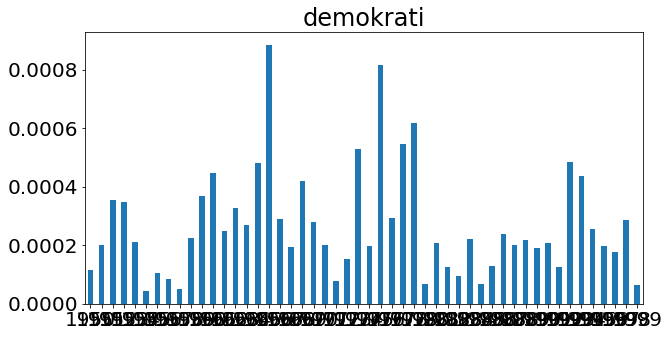

In [20]:
barchart(keyword, reference);

In [21]:
from time import time

collocations = dict()
step = 1

for i in range(1950, 2000):
    print(i)
    t0 = time()
    try:
        collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)
    print((time() - t0)/60, "minutter")

1950
0.020186944802602132 minutter
1951
0.017997157573699952 minutter
1952
0.01798281669616699 minutter
1953
0.017047659556070963 minutter
1954
0.016963485876719156 minutter
1955
0.018236573537190756 minutter
1956
0.016590579350789388 minutter
1957
0.01679858366648356 minutter
1958
0.016623854637145996 minutter
1959
0.019388945897420247 minutter
1960
0.021482443809509276 minutter
1961
0.024765598773956298 minutter
1962
0.02983500560124715 minutter
1963
0.041625487804412845 minutter
1964
0.03298418521881104 minutter
1965
0.024657615025838218 minutter
1966
0.022951364517211914 minutter
1967
0.024907147884368895 minutter
1968
0.025461455186208088 minutter
1969
0.02741230328877767 minutter
1970
0.029099448521931966 minutter
1971
0.022221791744232177 minutter
1972
0.021998151143391927 minutter
1973
0.022674163182576496 minutter
1974
0.02483778397242228 minutter
1975
0.02491108576456706 minutter
1976
0.024393479029337566 minutter
1977
0.021511789162953696 minutter
1978
0.02100270986557007 mi

In [22]:
colls = nb.frame(collocations)

In [23]:
colls.to_csv(filename)

In [24]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [25]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [26]:
agg = group_frames(colls)

In [27]:
nb.normalize_corpus_dataframe(agg)

True

In [28]:
ref = group_frames(referenceerence)


# Opptelling

# Sammenligner med en referanse


In [31]:
ref.sort_values(by=ref.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,13.2679,12.6441,12.427,12.9491,13.4856
",",8.06466,8.33859,7.13354,7.43073,7.35683
i,4.95452,5.00905,4.82851,4.44413,4.1343
og,4.21992,4.27792,3.74805,3.72824,3.27295
til,2.32235,2.26837,2.16929,2.07421,1.79231
er,2.30797,2.1888,2.14749,2.14347,2.0037
-,1.08239,1.4123,1.92406,2.44675,3.5605
som,2.03696,2.03722,1.91573,1.79946,1.53303
det,2.26316,2.11203,1.91387,1.71987,1.41484
for,1.85716,1.88089,1.84609,1.6954,1.47105


In [32]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0507393,0.0516302,0.0501388,0.0522712,0.0534833
",",0.033624,0.0332161,0.0321793,0.0331582,0.0348963
i,0.0270873,0.0304955,0.0305158,0.0290154,0.0294905
og,0.0291352,0.0291361,0.0290101,0.0317559,0.0313881
det,0.025691,0.0220286,0.0216963,0.0185494,0.0160011
er,0.0213851,0.0187784,0.0210234,0.0217114,0.0218845
for,0.0169543,0.0166078,0.0167066,0.0181199,0.0174263
som,0.0167032,0.015597,0.0162146,0.0154906,0.0147779
et,0.0166323,0.0149248,0.0152801,0.0162872,0.0154279
at,0.0120482,0.0119801,0.0126566,0.0117862,0.0111195


In [60]:
pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]**1.3/(pd.concat([agg[i], ref[i]],axis=1).sum(axis=1))

In [61]:
nb.normalize_corpus_dataframe(pmi)

True

<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [62]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(35).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
diktatur,0.000289314,0.000165062,0.00018714,0.000236198,0.000189504
eiendomsbesittende,0.000269036,0.000129635,4.70753e-05,0.00010758,3.90817e-05
demokrati,0.000264113,0.000132733,0.000156933,0.000228722,0.000113396
sosialisme,0.000242031,0.000102796,0.000164368,0.000115844,7.24847e-05
Demokrati,0.000204643,4.00095e-05,0.000113057,0.000159589,9.14684e-05
folkestyre,0.000204627,0.000118092,0.000169105,0.000167055,0.00016355
frihet,0.000192212,9.42199e-05,0.000139427,0.000212051,0.000106844
parlamentarisme,0.000189808,0.000104613,0.000103458,0.000176059,4.47919e-05
eiendomsbesiddende,0.000183533,6.72307e-05,6.1969e-05,0,0
Demokratiet,0.000180909,9.41684e-05,4.72271e-05,9.39714e-05,5.2804e-05


In [63]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(35).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
industrielt,0.000176274,0.000383847,0.00012402,1.56469e-05,3.43176e-06
Industrielt,0.000165933,0.000278093,0.000125128,1.21302e-06,0
arbeidsplassen,5.12822e-06,0.000240244,0.00014632,2.44278e-05,3.53161e-06
industrielle,4.71735e-05,0.000195095,9.31959e-06,2.89097e-06,6.40402e-07
diktatur,0.000289314,0.000165062,0.00018714,0.000236198,0.000189504
medbestemmelsesrett,6.62275e-05,0.000135096,7.20865e-05,2.5013e-05,2.78432e-05
rettssikkerhet,0.000173985,0.000134578,0.00015566,9.96927e-05,8.08301e-05
demokrati,0.000264113,0.000132733,0.000156933,0.000228722,0.000113396
eiendomsbesittende,0.000269036,0.000129635,4.70753e-05,0.00010758,3.90817e-05
Diktatur,4.13473e-05,0.000129617,0.000142102,9.89304e-05,8.23623e-05


In [64]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(35).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
diktatur,0.000289314,0.000165062,0.00018714,0.000236198,0.000189504
folkestyre,0.000204627,0.000118092,0.000169105,0.000167055,0.00016355
sosialisme,0.000242031,0.000102796,0.000164368,0.000115844,7.24847e-05
demokrati,0.000264113,0.000132733,0.000156933,0.000228722,0.000113396
rettssikkerhet,0.000173985,0.000134578,0.00015566,9.96927e-05,8.08301e-05
hverdagen,9.29288e-07,1.4711e-05,0.000148793,2.79752e-06,1.21542e-06
arbeidsplassen,5.12822e-06,0.000240244,0.00014632,2.44278e-05,3.53161e-06
Diktatur,4.13473e-05,0.000129617,0.000142102,9.89304e-05,8.23623e-05
frihet,0.000192212,9.42199e-05,0.000139427,0.000212051,0.000106844
bedriftslivet,3.1304e-05,0.000116772,0.00012905,1.89742e-05,3.17442e-05


In [65]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(35).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
diktatur,0.000289314,0.000165062,0.00018714,0.000236198,0.000189504
demokrati,0.000264113,0.000132733,0.000156933,0.000228722,0.000113396
frihet,0.000192212,9.42199e-05,0.000139427,0.000212051,0.000106844
flerpartisystem,1.33993e-05,2.03303e-05,6.34227e-05,0.000194378,0.000109707
pluralisme,0,4.33033e-05,0.000102977,0.000189156,5.65343e-05
parlamentarisme,0.000189808,0.000104613,0.000103458,0.000176059,4.47919e-05
menneskerettigheter,0.000137398,2.47483e-05,5.56207e-05,0.000173728,0.000222635
folkestyre,0.000204627,0.000118092,0.000169105,0.000167055,0.00016355
flertallsstyre,1.66476e-05,6.0222e-05,8.973e-06,0.000161688,8.90132e-05
pluralistisk,0,4.45282e-05,0.000123216,0.000159988,6.67539e-05


In [66]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(35).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
menneskerettigheter,0.000137398,2.47483e-05,5.56207e-05,0.000173728,0.000222635
diktatur,0.000289314,0.000165062,0.00018714,0.000236198,0.000189504
folkestyre,0.000204627,0.000118092,0.000169105,0.000167055,0.00016355
Demo,0,0,0,0,0.000143418
markedsøkonomi,0,4.72066e-05,1.47388e-05,0.000106131,0.000140901
rettsstat,0.000104537,1.97058e-05,8.78524e-05,0.000128144,0.000138511
Humanioradagene,0,0,0,0,0.000125033
ytringsfrihet,8.22278e-05,1.98145e-05,0.000122871,0.000145287,0.000123487
Wozene,0,0,0,0,0.000120795
Wachtmeister,0,0,0,0,0.000117748


<br>
<br>

# Assosiasjoner og variasjon over år.

In [68]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

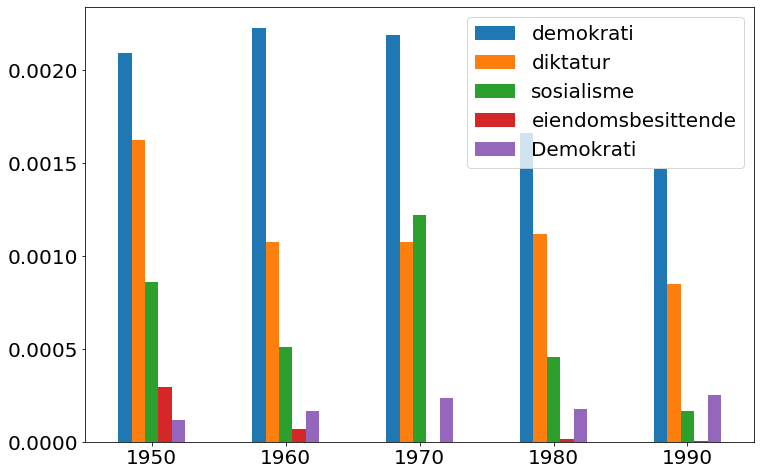

In [69]:
freq_assoc_val(agg, pmi, 0)

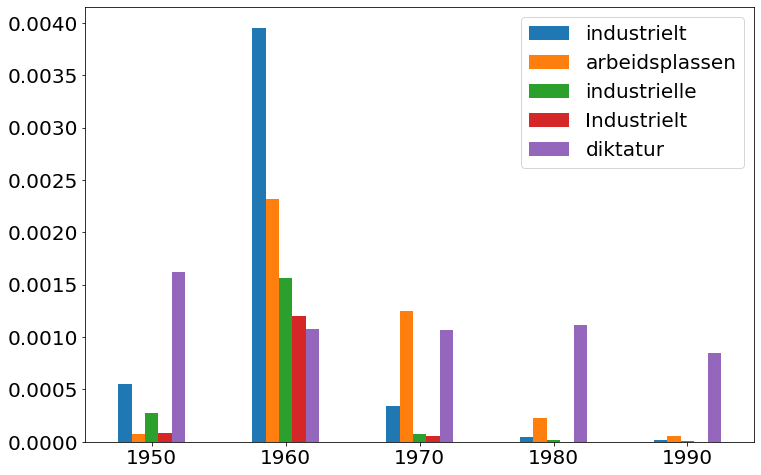

In [73]:
freq_assoc_val(agg, pmi, 1)

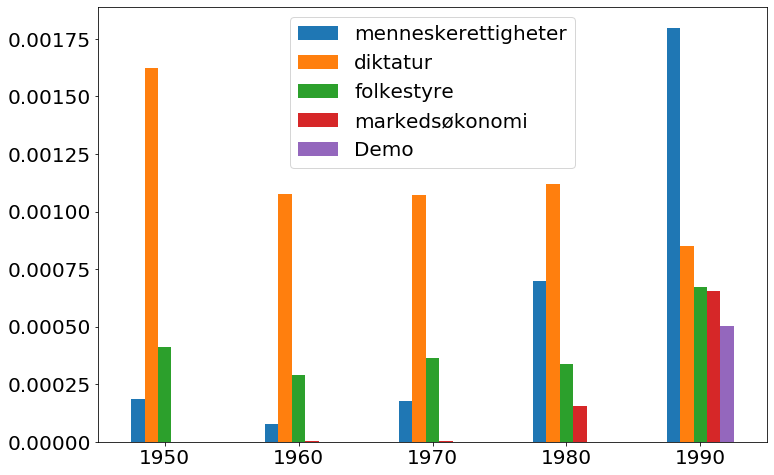

In [74]:
freq_assoc_val(agg, pmi, 4)

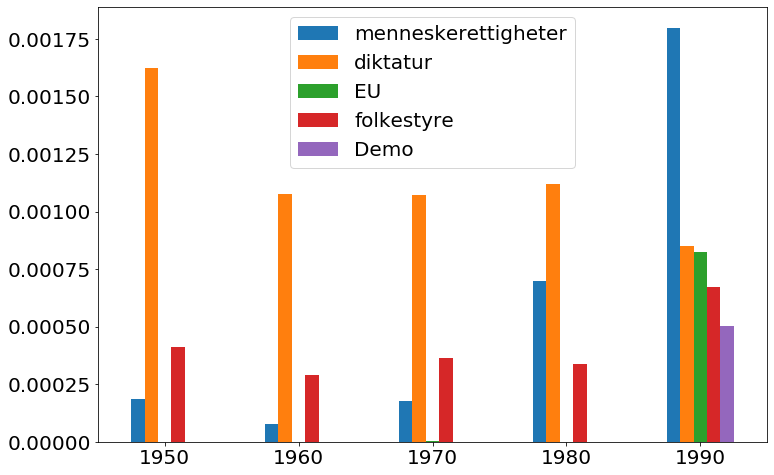

In [43]:
freq_assoc_val(agg, pmi, 4)

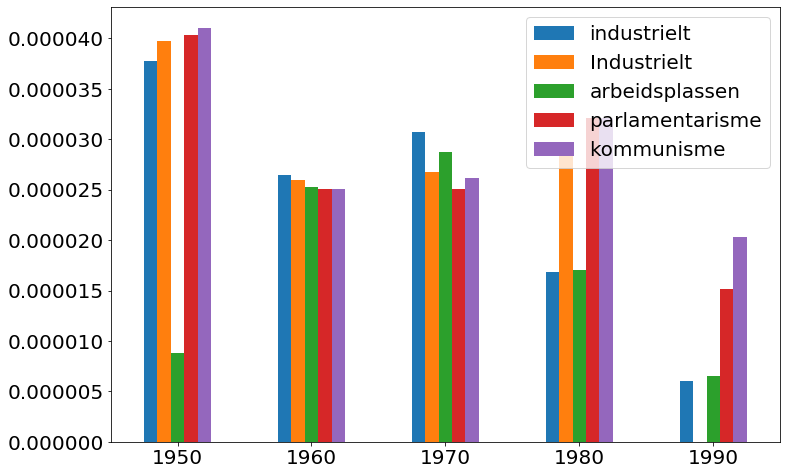

In [44]:
freq_assoc_val(pmi, pmi, 1)

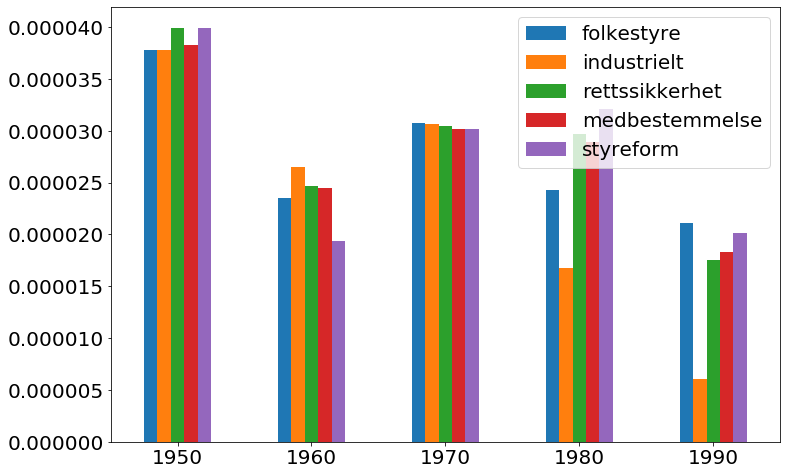

In [45]:
freq_assoc_val(pmi, pmi, 2)

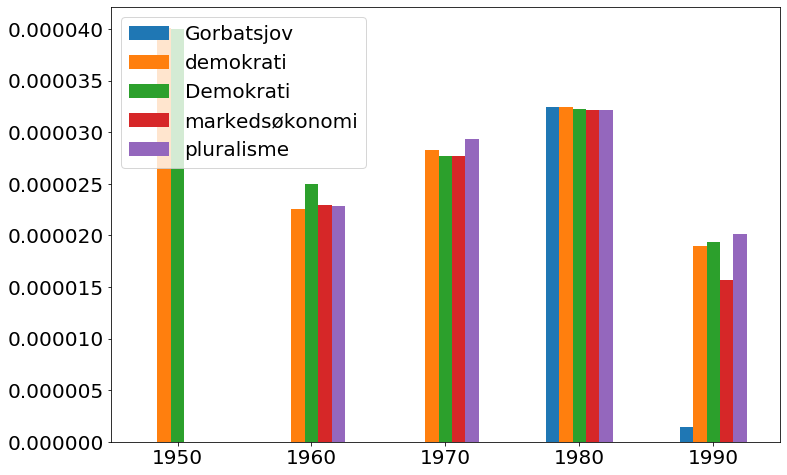

In [46]:
freq_assoc_val(pmi, pmi, 3)

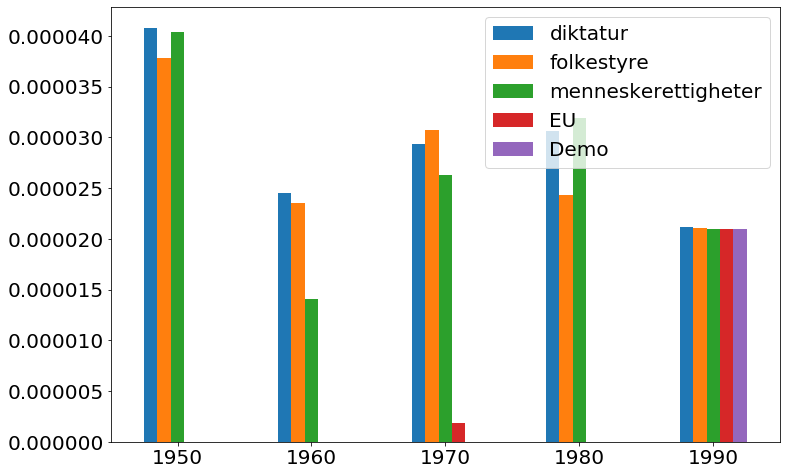

In [47]:
freq_assoc_val(pmi, pmi, 4)

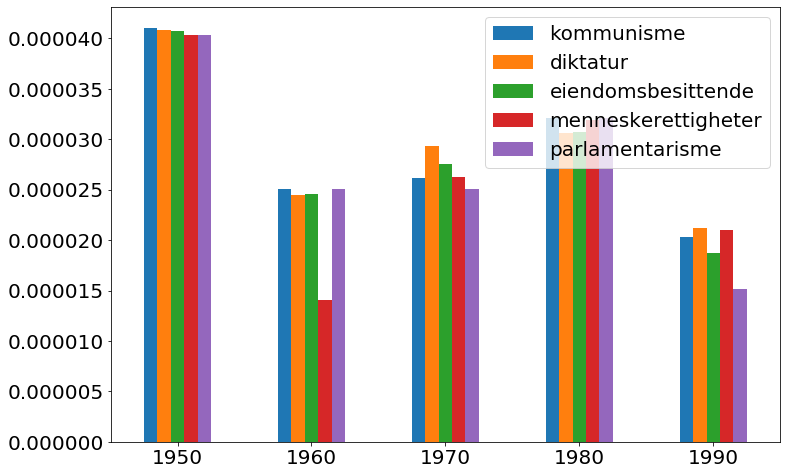

In [48]:
freq_assoc_val(pmi, pmi, 0)

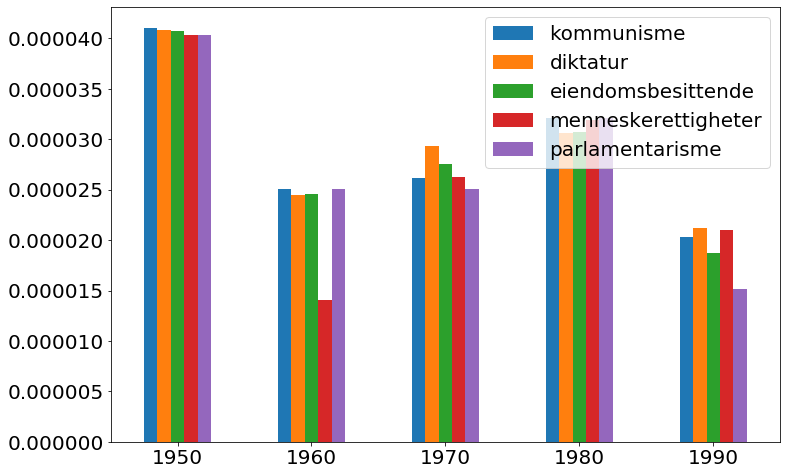

In [49]:
freq_assoc_val(pmi, pmi, 0)

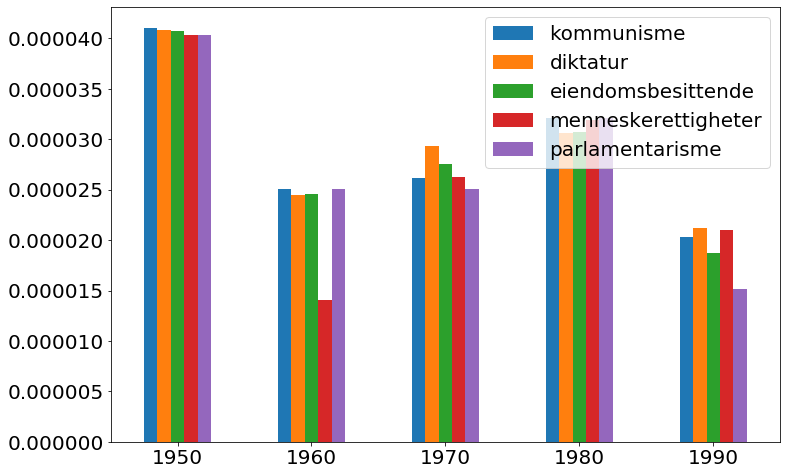

In [50]:
freq_assoc_val(pmi, pmi, 0)

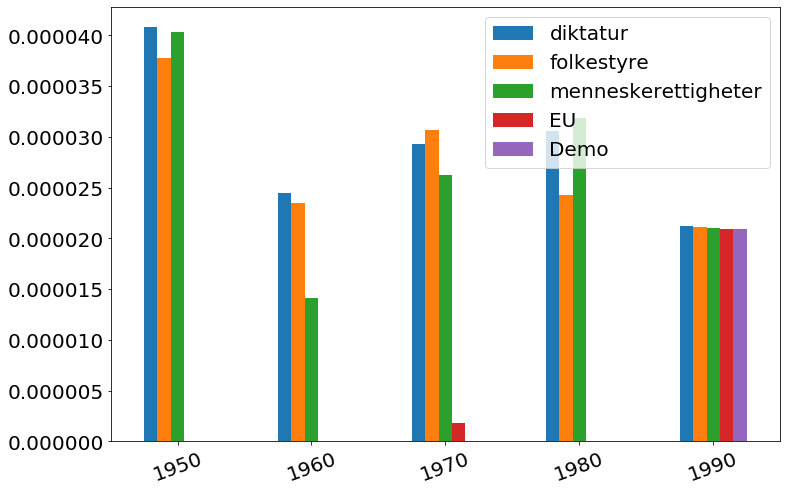

In [51]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

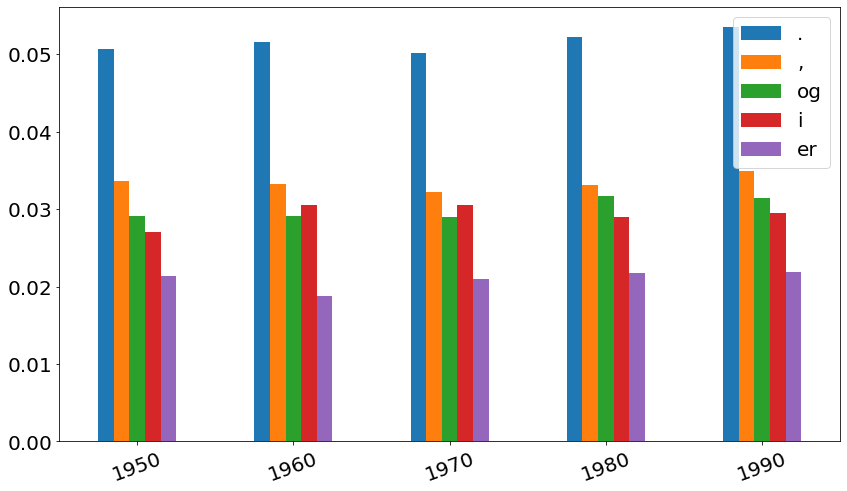

In [52]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [53]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>Diktatur, Karamanlis, Demokratiet, AKP, Soares, Colombia, Sletbak, Weber, Vestens, Kongress, Kommunisme, ØD, Rhodesia, Presserunden, Begrepet, SVs, Francos, Suarez, Notaker, Libertas, Romatraktaten, Dahl-Hansen, Janata</span>

## subst
<span style='font-size:1.1em'>folkestyre, rettssikkerhet, styreform, bedriftsdemokrati, respekten, bedriftsdemokratiet, rettsstat, medinnflytelse, pressefrihet, ulydighet, styresett, politistat, sentralisme, hverdagen, anarki, humanisme, menneskerett, menneskerettighetene, ytringsfriheten, sosialisering, organisasjonsfrihet, folkeviljen, råderett, ideal, grasrota, pluralisme, sunnhetstegn, selvråderett, diktatur, folkedemokrati, demokratier, forsoning, likhetstegn, rettsstaten, monarki, folkeavstemninger, pamper, flerpartisystem, styreformer, spillfekteri, makthavere</span>
## adj
<span style='font-size:1.1em'>industrielt, uforenlig, funksjonsdyktig, livskraftig, konstitusjonelle, autoritært, fullkomment, konstitusjonelt, proletarisk, fascistisk, totalitært, sunne, ufullkomment</span>
## unknown
<span style='font-size:1.1em'>medbestemmelse, kvardagen, folkenes, samfunnsform, kriseløsning, flertallets, øst-europeiske, borgarleg, vest-europeisk, lønnstakerfond, maktkonsentrasjon, kyrkjelege, gjeninnføring, språkleg, enkeltmennesket, flertallsdiktatur, meningsfrihet, vestlege, flertallsstyre</span>
## verb
<span style='font-size:1.1em'>gjeninnføre, misbrukes, avskaffe</span>
## fork
<span style='font-size:1.1em'>m-l</span>


# Hvordan utvikler ordene seg?

In [54]:
barchart = lambda w, title='', df=pmi: df.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

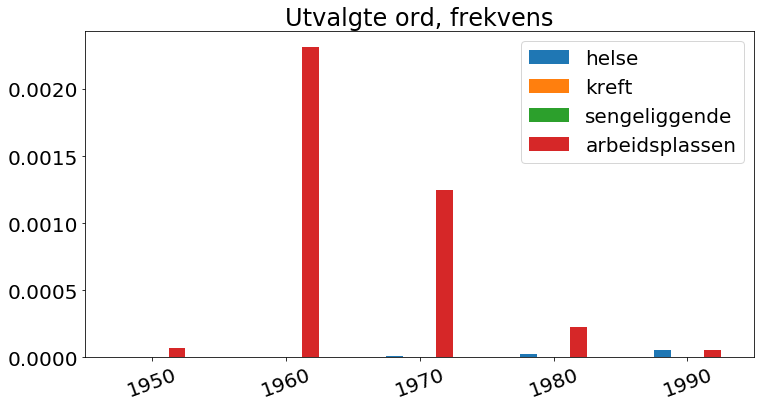

In [55]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, frekvens', df=agg);

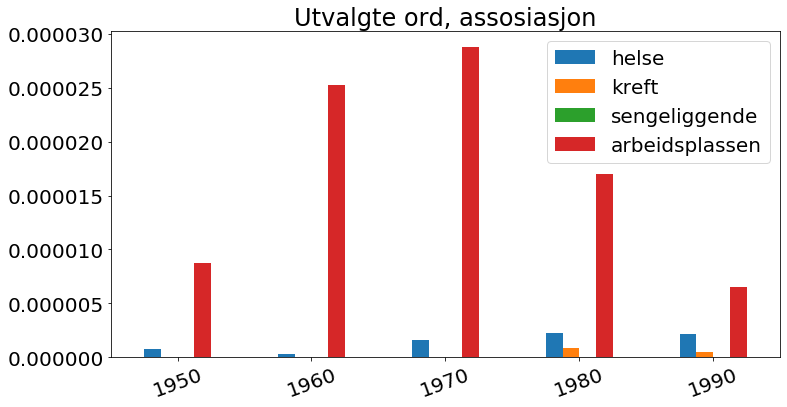

In [56]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, assosiasjon');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

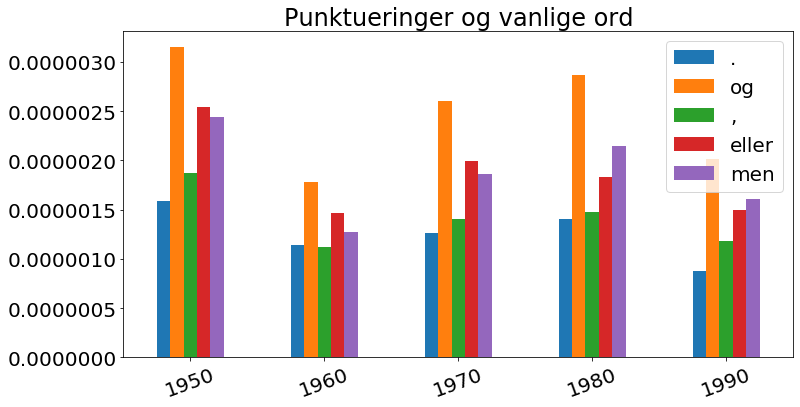

In [57]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', pmi);

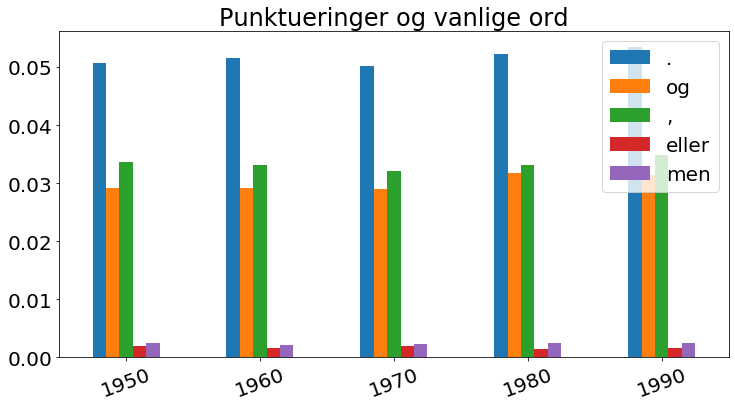

In [58]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', agg);

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [59]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

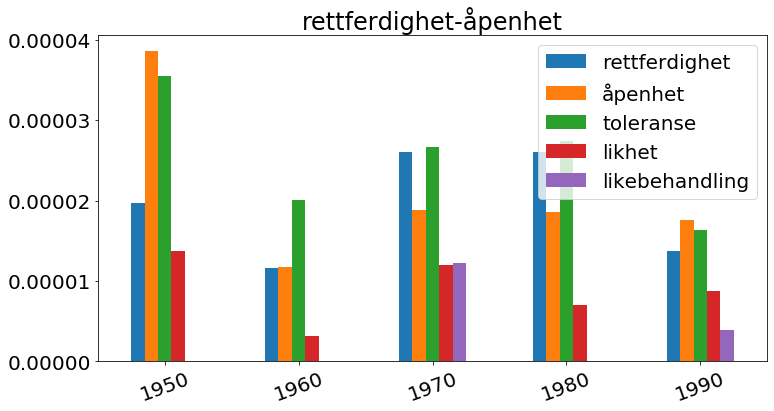

In [60]:
commchart(2, (0,5));

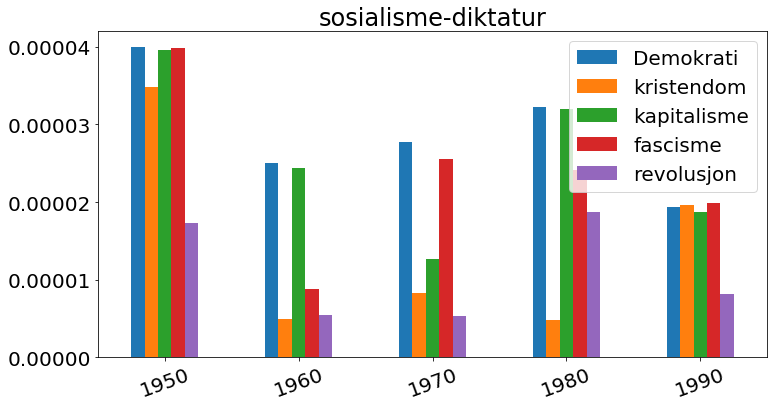

In [61]:
commchart(1, (3, 8))

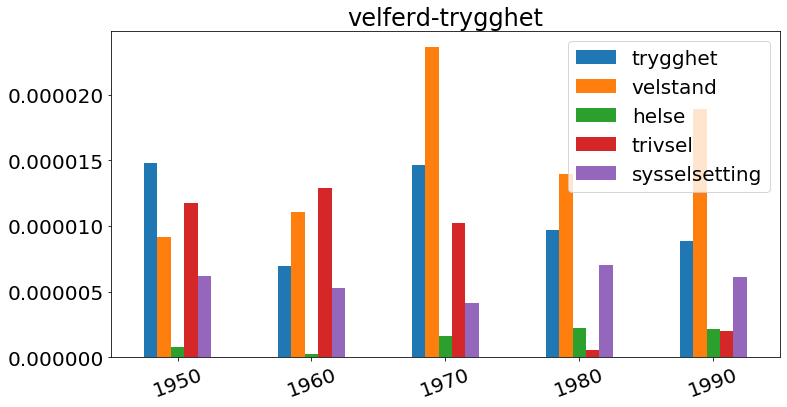

In [62]:
commchart(3)